In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install lightgbm catboost shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
!unzip /content/drive/MyDrive/AURA/CIC-IDS2017/CIC-IDS2017.zip -d /content/drive/MyDrive/CIC-IDS2017

In [ ]:
import glob
path = "/content/drive/MyDrive/CIC-IDS2017/"
csv_files = glob.glob(path + "*.csv")
df = pd.concat([pd.read_csv(file, low_memory=False) for file in csv_files],ignore_index=True)
df.columns = df.columns.str.strip()

print("shape : ",df.shape)
df.head()


shape :  (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df = df.replace([np.inf , -np.inf],np.nan)
df = df.dropna()

df['Label'] = df['Label'].apply(lambda x: 'BENIGN' if x== 'BENIGN' else 'ATTACK')

#df = df.loc[: , df.nunique()> 1]

label_encoder = LabelEncoder()

df['Label'] = label_encoder.fit_transform(df['Label'])

X = df.drop('Label' , axis=1)
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.2 , random_state=42, stratify =y)
model = lgb.LGBMClassifier(n_estimators=100,random_state = 42)
model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1817055, number of negative: 445245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.057474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14613
[LightGBM] [Info] Number of data points in the train set: 2262300, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803189 -> initscore=1.406348
[LightGBM] [Info] Start training from score 1.406348


LGBMClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy :  0.9992043509625586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111311
           1       1.00      1.00      1.00    454265

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


SHAP values shape: (100, 78)


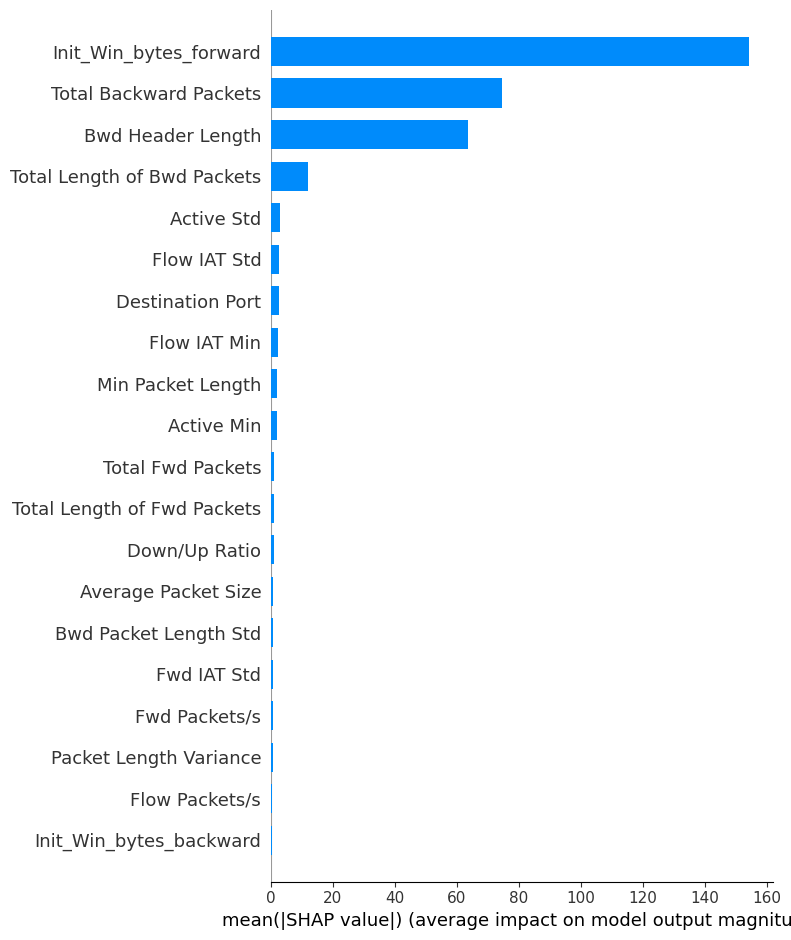

In [ ]:


X_test_sample = pd.DataFrame(X_test[:100], columns=X.columns)


explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_test_sample)


print(f"SHAP values shape: {np.shape(shap_values)}")  # Should print (100, 78)


shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


In [ ]:
import joblib
joblib.dump(model,'/content/drive/MyDrive/AURA/aura_ids_lightgbm.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/AURA/scaler.pkl')
joblib.dump(label_encoder, '/content/drive/MyDrive/AURA/label_encoder.pkl')


['/content/drive/MyDrive/AURA/label_encoder.pkl']